In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import starry
starry.config.lazy=False
from scipy.linalg import cho_factor, cho_solve
from lightkurve import search_targetpixelfile
pixelfile = search_targetpixelfile('KIC 2996903', quarter=1).download(quality_bitmask='hardest');

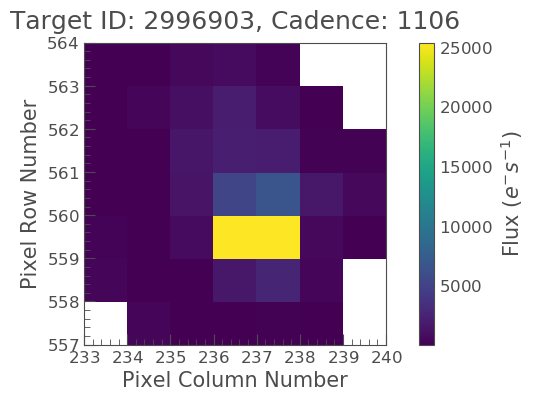

In [3]:
pixelfile.plot(frame=1);

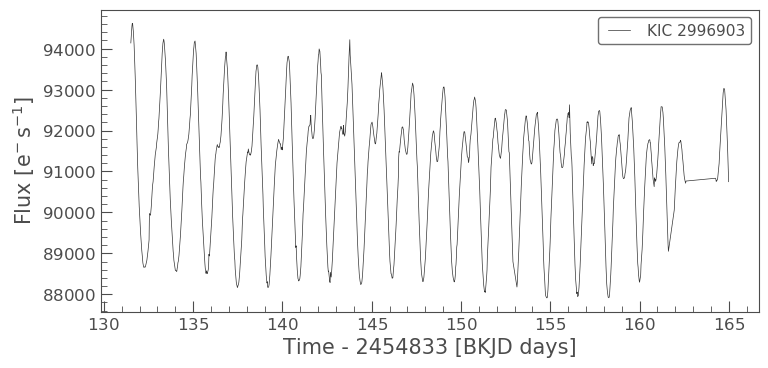

In [4]:
lc = pixelfile.to_lightcurve(aperture_mask='all');
lc.plot();

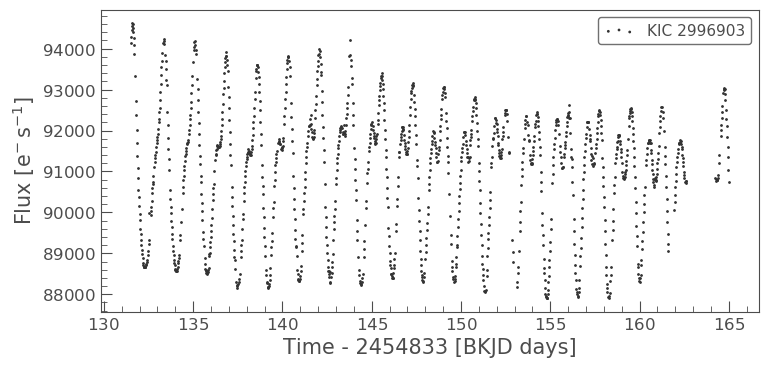

In [18]:
lc.scatter();

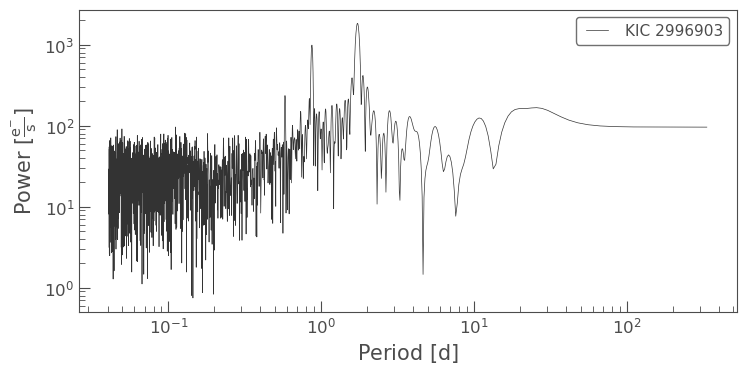

In [41]:
pg = lc.to_periodogram(oversample_factor=10)
pg.plot(view='period', scale='log');

In [53]:
p=pg.period_at_max_power
p.value

1.7342836803093449

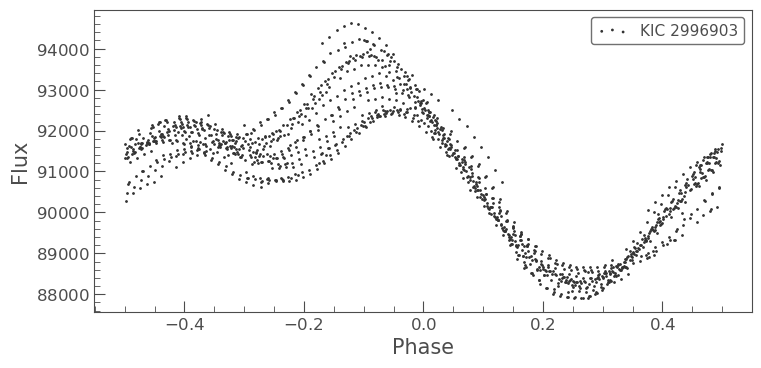

In [51]:
lc.fold(pg.period_at_max_power).scatter();

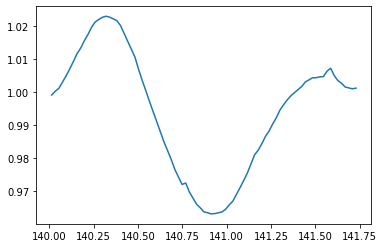

In [83]:
t1=lc.time[np.where((lc.time>=140) & (lc.time<=(140+p.value)))]
flux1=lc.flux[np.where((lc.time>140)&(lc.time<(140+p.value)))]
norm1=np.median(flux1)
flux1/=norm1
plt.plot(t1,flux1)

In [155]:
map=starry.Map(10)
map.inc = 90
theta1=(360/p.value)*(t1-140)
map.amp = 1.1
A=map.design_matrix(theta=theta1)

Pre-computing some matrices... Done.
Compiling `X`... Done.


In [156]:
lc.flux_err
flux1_err=lc.flux_err[np.where((lc.time>140)&(lc.time<(140+p.value)))]
flux1_err/=norm1
C=flux1_err**2

In [157]:
map.set_data(flux1,C=C)
map.set_prior(L=1e-2)
y_hat_1,_=map.solve(design_matrix=A)
map.draw()

Compiling `render`... Done.


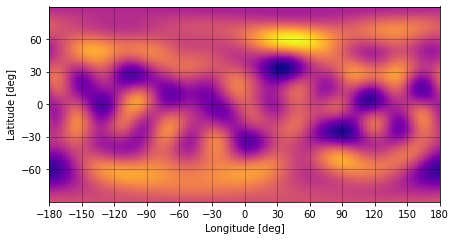

In [158]:
map.show(projection="rect")

<ErrorbarContainer object of 3 artists>

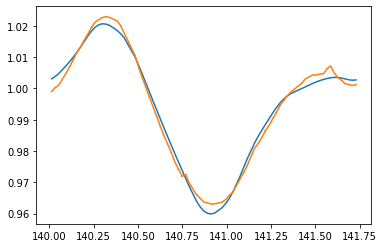

In [159]:
f_1=A.dot(np.append([1],y_hat_1))
plt.plot(t1,f_1)
plt.errorbar(t1,flux1,yerr=flux1_err)